# Proyecto - Iris

Materia: Minería de Datos

Alumnos:
* Cantú Olivarez Arturo - 10919
* Cruz Cervantes Diego Sebastián - 10032

### Contexto del proyecto:

El conjunto de datos Iris es un conjunto de datos clásico en el campo del aprendizaje automático y la estadística. Contiene mediciones de tres especies diferentes de flores de iris (Iris setosa, Iris versicolor e Iris virginica), usaremos KNN para clasificar las especies basándonos en las características de las flores.


### 0. Importar librerías


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pickle #Esta librería permite guardar objetos de Python en archivos para su uso posterior.

### 1. Cargar el dataset

In [2]:
df = pd.read_csv("Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2. EDA - Exploratory Data Analysis

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Verificar si hay valores nulos
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Este dataset no tiene valores nulos y todas las columnas son numéricas excepto la columna "Species" que es categórica.

#### Visualización de datos

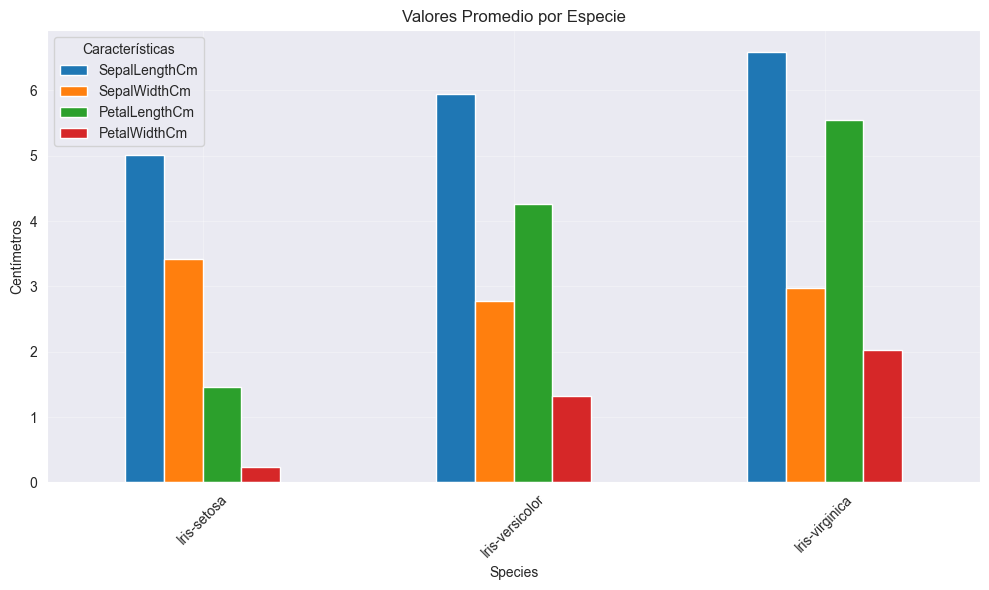

In [7]:
caracteristicas = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
promedioEspecies = df.groupby('Species')[caracteristicas].mean()

promedioEspecies.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Valores Promedio por Especie')
plt.ylabel('Centímetros')
plt.legend(title='Características')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Esta visualización nos permite observar las diferencias en las características promedio de las flores entre las tres especies de iris.

Se ve claramente que las características de Iris setosa son significativamente diferentes en comparación con las otras dos especies, especialmente en términos de longitud y ancho del pétalo.

Lo que significa que el reto será la clasificación entre Iris versicolor e Iris virginica, ya que sus características son muy similares.

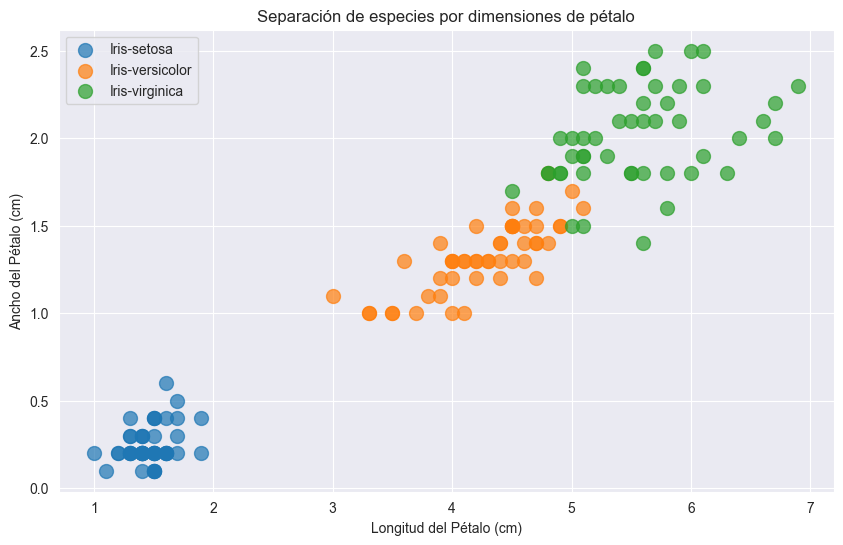

In [8]:
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['PetalLengthCm'], subset['PetalWidthCm'],
                label=species, alpha=0.7, s=100)
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.title('Separación de especies por dimensiones de pétalo')
plt.legend()
plt.grid(True)
plt.show()

Buscando explorar la relación entre la longitud y el ancho del pétalo, podemos observar que las especies Iris versicolor e Iris virginica tienen una superposición significativa en estas dimensiones, confirmando que la clasificación entre estas dos especies será más complicada.

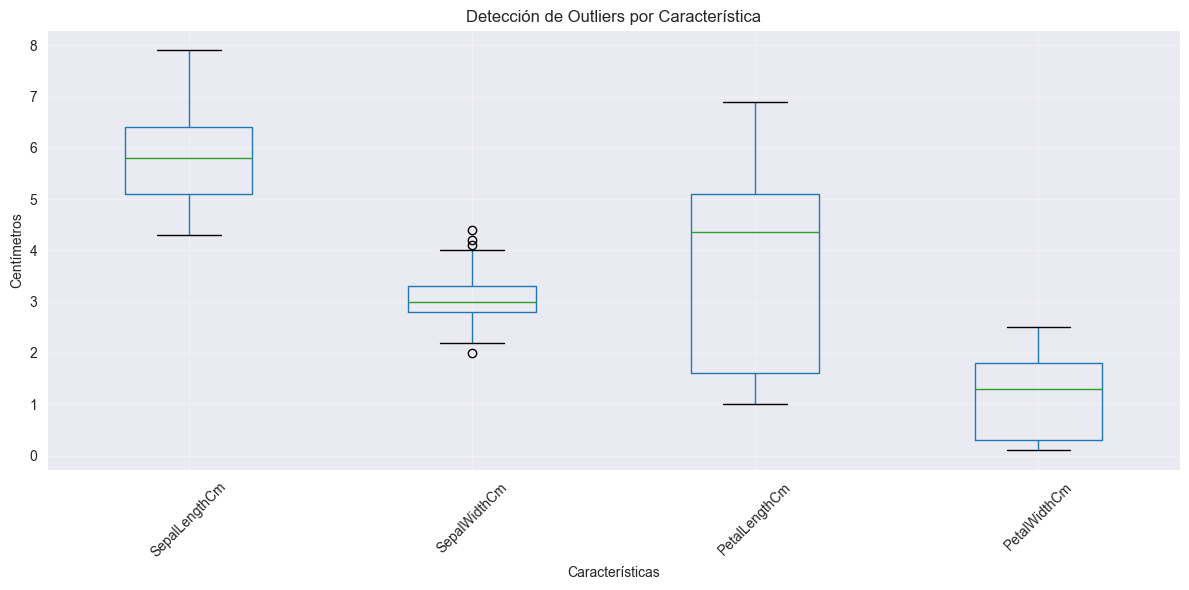

In [9]:
plt.figure(figsize=(12, 6))
df[caracteristicas].boxplot()
plt.title('Detección de Outliers por Característica')
plt.ylabel('Centímetros')
plt.xlabel('Características')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explorando los outliers en las características del conjunto de datos, podemos observar que hay algunos valores atípicos en las dimensiones del sépalo, pero dado que las observaciones son pocas y no afectan significativamente la distribución general, no haremos ninguna limpieza de datos en este caso, unicamente escalaremos los datos para el modelo KNN.

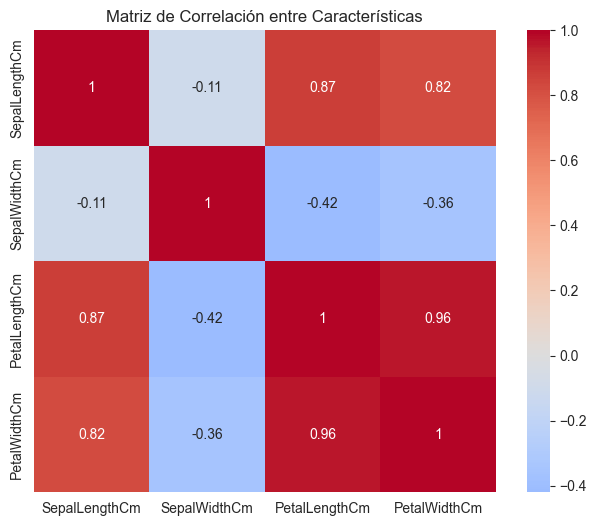

In [10]:
plt.figure(figsize=(8, 6))
correlation = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlación entre Características')
plt.show()

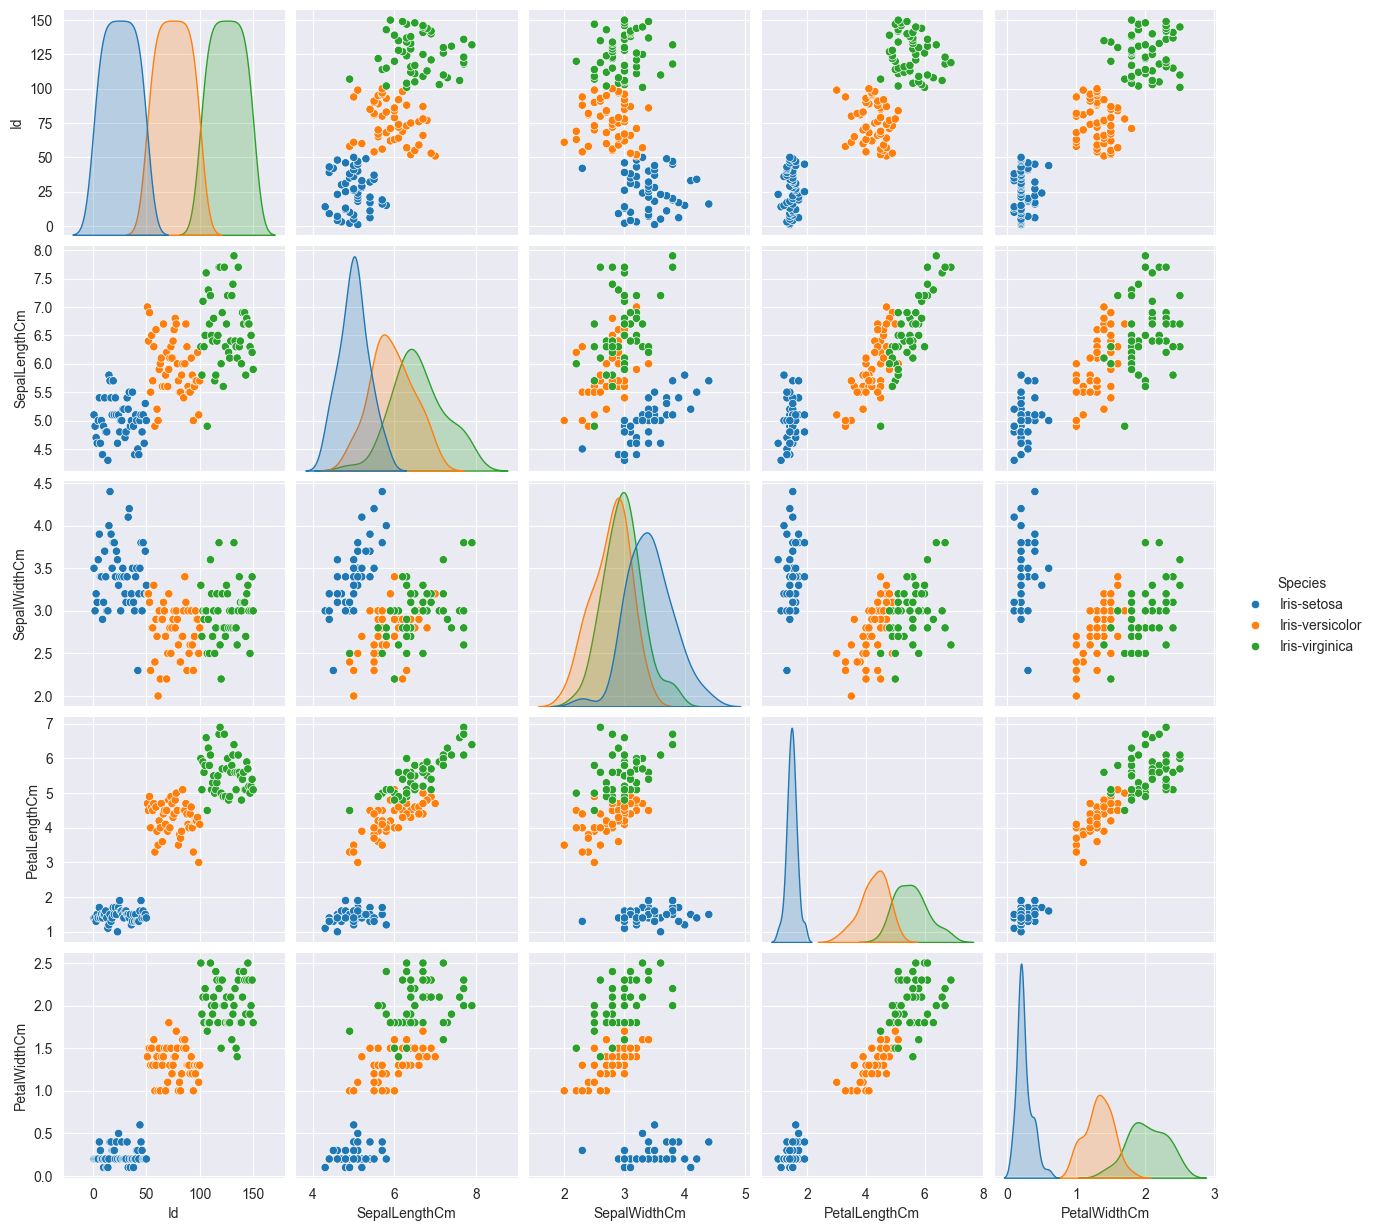

In [11]:
sns.pairplot(df, hue='Species')


Las visualizaciones más importantes son donde se ven las 3 "nubes" de puntos separadas, es decir, las combinaciones de características que permiten una mejor separación entre las especies.

### 3. Preparación de datos

In [12]:
# Codificación de la variable objetivo
from sklearn.preprocessing import LabelEncoder

# Codificar la variable objetivo
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

# Ver la codificación
print(df[['Species', 'Species_encoded']].drop_duplicates())

             Species  Species_encoded
0        Iris-setosa                0
50   Iris-versicolor                1
100   Iris-virginica                2


### 4. Modelo - KNN

In [13]:
# Preparar datos
X = df[caracteristicas]
y = df['Species_encoded']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar datos
scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(X_train)
XtestScaled = scaler.transform(X_test)

# Búsqueda de mejores hiperparámetros
parametrosGrid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
gridBusqueda = GridSearchCV(knn, parametrosGrid, cv=5, scoring='accuracy', n_jobs=-1) #Recibe
gridBusqueda.fit(XtrainScaled, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", gridBusqueda.best_params_)
print("Mejor accuracy en validación cruzada:", gridBusqueda.best_score_)

# Modelo final con mejores parámetros
knnEncontrado = gridBusqueda.best_estimator_

# Predecir
y_pred = knnEncontrado.predict(XtestScaled)

# Evaluación
print("\nAccuracy en test:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Mejor accuracy en validación cruzada: 0.975

Accuracy en test: 0.9666666666666667

Matriz de Confusión:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### 5. Guardado de modelo

In [14]:
# Guardar modelo, scaler y encoder
with open('knnModel.pkl', 'wb') as f: # Guardar el modelo entrenado, wb es write binary.
    pickle.dump(knnEncontrado, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('labelEncoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

df.to_csv('irisProcesado.csv', index=False)

print("Modelo, scaler, encoder y datos guardados")

metricas = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='weighted'),
    'recall': recall_score(y_test, y_pred, average='weighted'),
    'f1_score': f1_score(y_test, y_pred, average='weighted')
}

with open('metricas.pkl', 'wb') as f:
    pickle.dump(metricas, f)

print("\nMétricas guardadas:", metricas)

Modelo, scaler, encoder y datos guardados

Métricas guardadas: {'accuracy': 0.9666666666666667, 'precision': 0.9696969696969696, 'recall': 0.9666666666666667, 'f1_score': 0.9665831244778613}
